# Data Set
## x = words index , y positive or negative opinion
### num_words : Rank by frequency

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000) 

Using TensorFlow backend.


In [0]:
x_val = x_train[20000:]
y_val = y_train[20000:]

x_train = x_train[:20000]
y_train = y_train[:20000]

In [0]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense
model = Sequential() 
model.add(Embedding(20000, 128, input_length=200))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0806 06:54:35.432771 139694965000064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 06:54:35.458236 139694965000064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 06:54:35.461762 139694965000064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 06:54:35.479527 139694965000064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0806 06:54:35.490113 

In [9]:
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 122s 6ms/step - loss: 0.3673 - acc: 0.8366 - val_loss: 0.2990 - val_acc: 0.8742
Epoch 2/25
20000/20000 [==============================] - 120s 6ms/step - loss: 0.1777 - acc: 0.9338 - val_loss: 0.3364 - val_acc: 0.8776
Epoch 3/25
20000/20000 [==============================] - 120s 6ms/step - loss: 0.0902 - acc: 0.9704 - val_loss: 0.4196 - val_acc: 0.8478
Epoch 4/25
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0551 - acc: 0.9819 - val_loss: 0.4492 - val_acc: 0.8710
Epoch 5/25
20000/20000 [==============================] - 121s 6ms/step - loss: 0.0281 - acc: 0.9912 - val_loss: 0.5637 - val_acc: 0.8616
Epoch 6/25
20000/20000 [==============================] - 120s 6ms/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.5937 - val_acc: 0.8560
Epoch 7/25
20000/20000 [==============================] - 120s 6ms/step - loss: 0.0195 - acc: 0.9945 - val_loss: 0.6125 - v

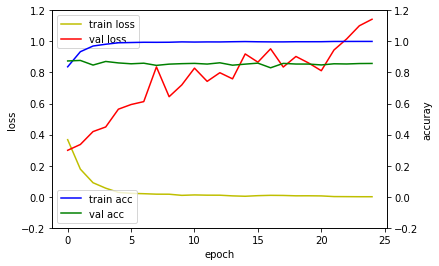

25000/25000 [==============================] - 33s 1ms/step
## evaluation loss and_metrics ##
[1.2913941606140136, 0.83956]


In [10]:

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
_________________________________________________________________
